# HW 2
writtern by JungYoung</br>
Last updated, 200919

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [50]:
class FiniteGrid:
    """
    calculate Laplace equation in the square grid lattice with finite boundary.
    n_grid: # on one side of a grid, scalar
    V: potential of the boundaries, (4, (upper, left, bottom, right))
    loc_e (optional): location of the electrons, n x 2
    alpha (optional, -1): V = alpha/r
    """
    def __init__(self, n_grid, V, loc_e=None, alpha=-1):
        self.n_grid = n_grid
        self.alpha = alpha
        self.V = V
        if loc_e is None: self.loc_e = np.array([])
        else: self.loc_e = np.array(loc_e)+1
        self._init_grids()
    
    def calc_potential_map(self, inf_val=-1000, tol=1e-3):
        self.dV_avg = 100
        n_max = 100
        n = 0
        while (self.dV_avg > tol) and (n < n_max):
            dV = self.update_map(inf_val)
            self.dV_avg = np.average(np.abs(dV))
            n += 1

    def update_map(self, inf_val):
        dV = np.zeros([self.n_grid+2, self.n_grid+2])
        for i in range(1, self.n_grid+1):
            for j in range(1, self.n_grid+1):
                if np.isfinite(self.Vmap[i, j]):
                    Vnew = self.get_pot(i-1, j, inf_val)
                    Vnew += self.get_pot(i, j-1, inf_val)
                    Vnew += self.get_pot(i+1, j, inf_val)
                    Vnew += self.get_pot(i, j+1, inf_val)
                    Vnew = Vnew / 4
                    dV[i, j] = Vnew - self.Vmap[i, j]
                    self.Vmap[i, j] = Vnew
        return dV
    
    def get_pot(self, i, j, inf_val):
        # get potential of [i, j] if V = -inf, return -1000
        x = self.Vmap[i, j]
        if not np.isfinite(x):
            x = inf_val
        return x

    def _init_grids(self):
        # grid indices
        target_grids = []
        for i in range(1, self.n_grid+1):
            for j in range(1, self.n_grid+1):
                target_grids.append([i, j])
        target_grids = np.array(target_grids)
        # create potential map
        self.Vmap = np.zeros([self.n_grid+2, self.n_grid+2])
        # fill in the grids with electrons
        for i in range(self.loc_e.shape[0]):
            self.Vmap[1:-1, 1:-1] += self.get_potential(self.loc_e[i, np.newaxis, :], target_grids)
        # set potential of the boundaries (fixed)
        self.Vmap[0, 1:-1] = self.V[0]
        self.Vmap[1:-1, 0] = self.V[1]
        self.Vmap[-1, 1:-1] = self.V[2]
        self.Vmap[1:-1, -1] = self.V[3]
    
    def get_potential(self, l, target_grids):
        # l: location of the elctron, 1 x 2
        dr = target_grids - l
        d = np.sqrt(dr[:, 0]**2 + dr[:, 1]**2)
        Vtmp = self.alpha / d
        return Vtmp.reshape([self.n_grid, self.n_grid])

    def show_potential(self, caxis=(None, None), interp=False):
        if interp:
            plt.imshow(self.interp_Vmap(), cmap="jet")
        else:
            plt.imshow(self.Vmap, cmap="jet", vmin=caxis[0], vmax=caxis[1])
        plt.axis("off")
        plt.colorbar()

    def interp_Vmap(self):
        from scipy import interpolate
        x0 = np.arange(self.n_grid+2)
        xq = np.linspace(0, self.n_grid+2, 1000)
        f = interpolate.interp2d(x0, x0, self.Vmap, kind="quintic")
        Vq = f(xq, xq)
        return Vq

## with no electron

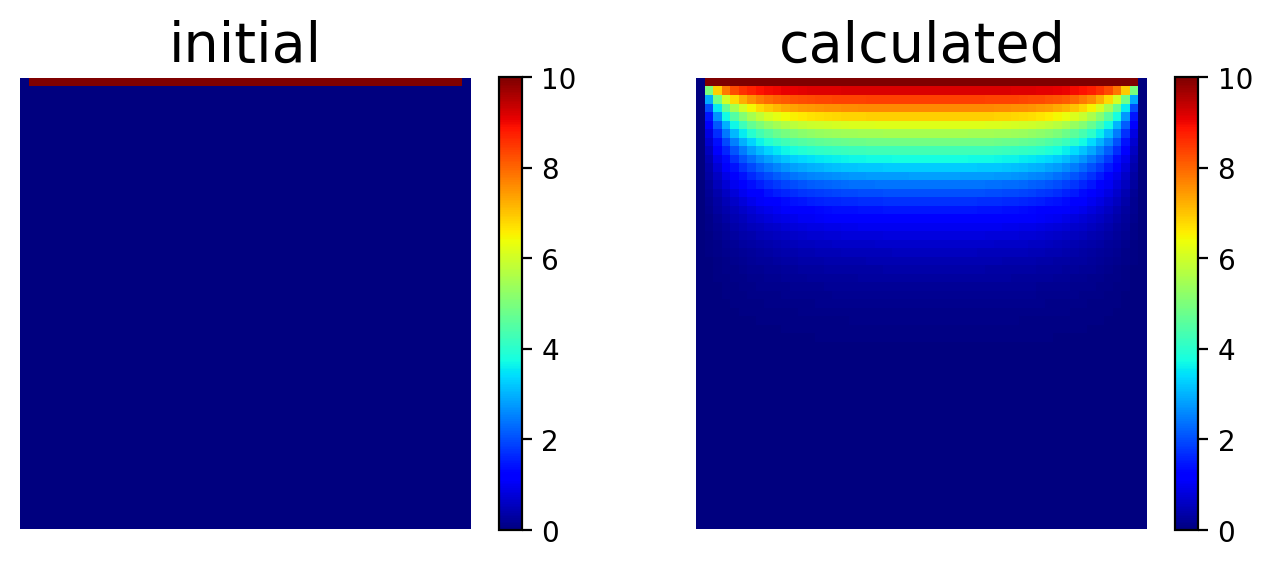

In [37]:
Vmap_test = FiniteGrid(51, [10, 0, 0, 0])
plt.figure(dpi=200, figsize=(8, 3))
plt.subplot(121)
Vmap_test.show_potential()
plt.title("initial", fontsize=20)

Vmap_test.calc_potential_map()
plt.subplot(122)
plt.title("calculated", fontsize=20)
Vmap_test.show_potential(interp=False)

In [73]:
print(Vmap_test.dV_avg)

0.005072891844174019


## with electrons

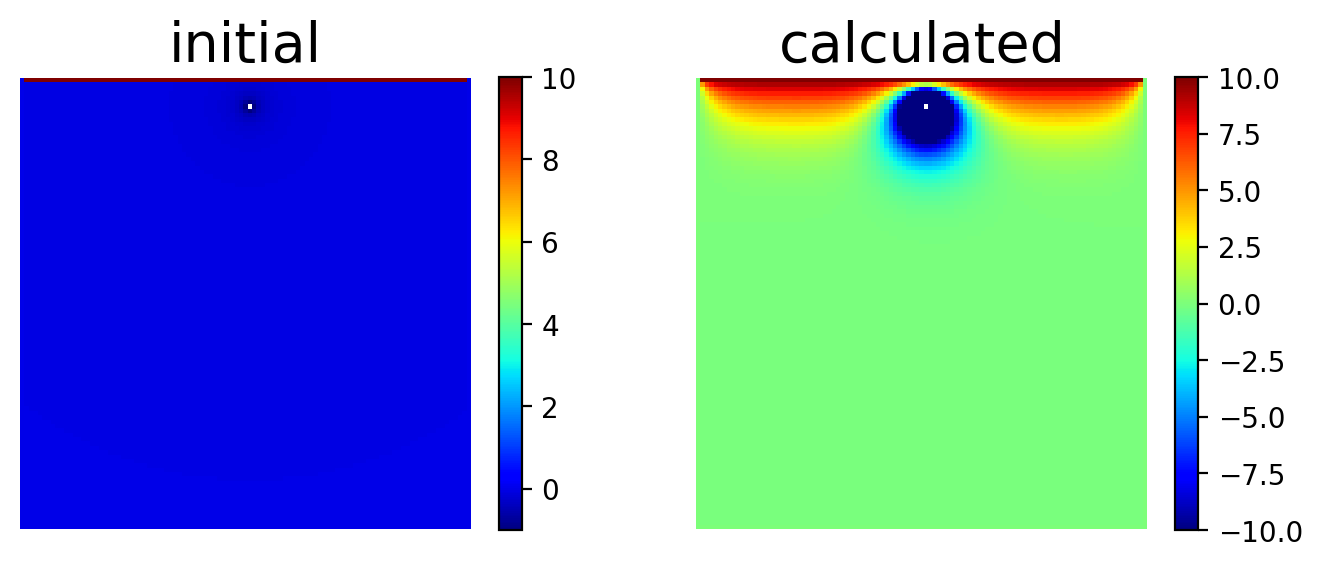

In [40]:
Vmap1 = FiniteGrid(101, [10, 0, 0, 0], loc_e=[[5, 51]])
plt.figure(dpi=200, figsize=(8, 3))
plt.subplot(121)
Vmap1.show_potential()
plt.title("initial", fontsize=20)

Vmap1.calc_potential_map(inf_val=-100)
plt.subplot(122)
plt.title("calculated", fontsize=20)
Vmap1.show_potential(interp=False, caxis=(-10, 10))

In [72]:
print(Vmap1.dV_avg)

0.003393950042326897


## with electrons

In [70]:
loc_es = []
d_e = 15
n_grid = 95
row = d_e+1
while row < n_grid:
    col = d_e+1
    while col < n_grid:
        loc_es.append([row, col])
        col += d_e+1
    row += d_e+1
Vmap2 = FiniteGrid(n_grid, [10, 0, 0, 0], loc_e=loc_es)

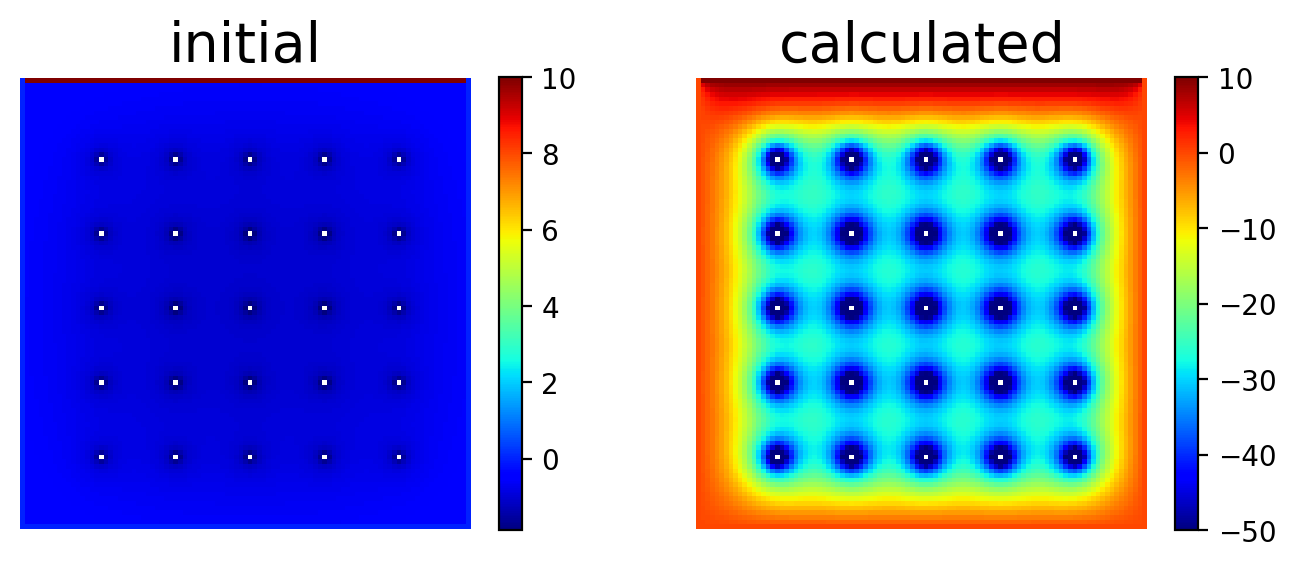

In [71]:
plt.figure(dpi=200, figsize=(8, 3))
plt.subplot(121)
Vmap2.show_potential()
plt.title("initial", fontsize=20)

Vmap2.calc_potential_map(inf_val=-100)
plt.subplot(122)
plt.title("calculated", fontsize=20)
Vmap2.show_potential(interp=False, caxis=(-50, 10))

In [74]:
print(Vmap2.dV_avg)

0.1561092344699373


## realistic model

In [78]:
L = 10
C = -1.60217662*10**(-19)/(4*np.pi*8.854187*10**(-12))
n_grid = 101
alpha = C / (L/n_grid)
print(alpha)

-1.4543643141208669e-08


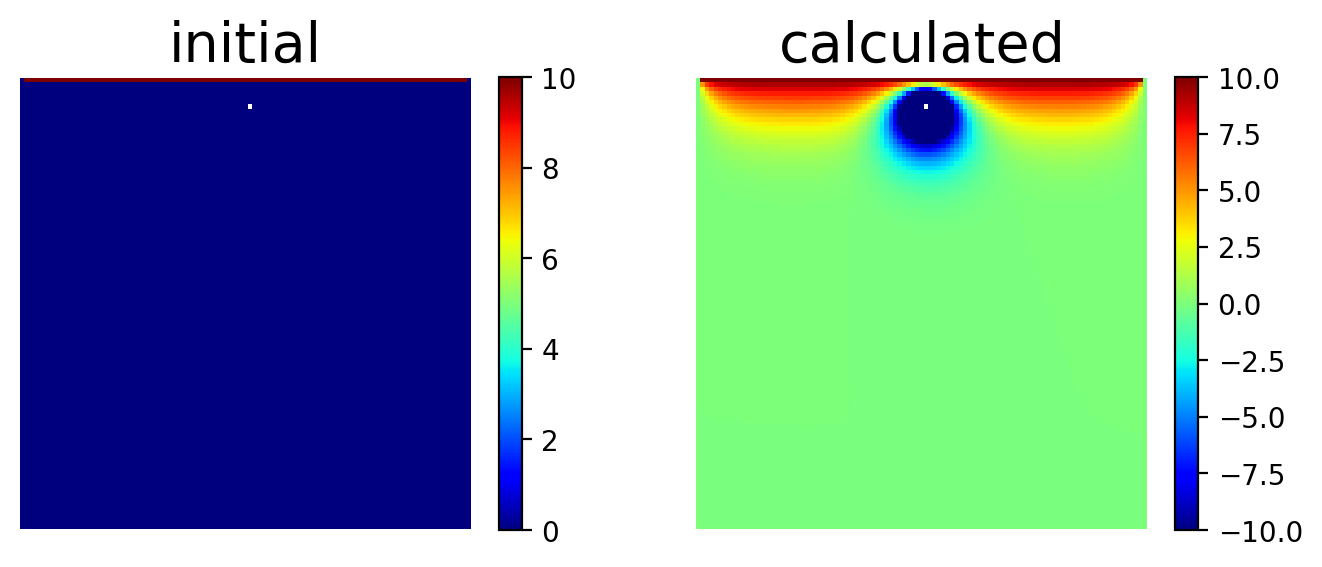

In [77]:
Vmap_real = FiniteGrid(101, [10, 0, 0, 0], loc_e=[[5, 51]], alpha=alpha)
plt.figure(dpi=200, figsize=(8, 3))
plt.subplot(121)
Vmap_real.show_potential()
plt.title("initial", fontsize=20)

Vmap_real.calc_potential_map(inf_val=-100)
plt.subplot(122)
plt.title("calculated", fontsize=20)
Vmap_real.show_potential(interp=False, caxis=(-10, 10))